In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost

In [4]:
pd.set_option('display.max_rows', 500)

In [5]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
comb_df = pd.concat([df, test_df], axis=0)

In [6]:
comb_df['FireplaceQu']= df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
comb_df['BsmtExposure']= df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
comb_df['BsmtCond']= df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
comb_df['BsmtQual']= df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
comb_df['BsmtFinType1']= df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
comb_df['BsmtFinType2']= df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
comb_df['GarageType']= df['GarageType'].fillna(df['GarageType'].mode()[0])
comb_df['GarageFinish']= df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
comb_df['GarageCond']= df['GarageCond'].fillna(df['GarageCond'].mode()[0])
comb_df['GarageQual']= df['GarageQual'].fillna(df['GarageQual'].mode()[0])
comb_df['Electrical']= df['Electrical'].fillna(df['Electrical'].mode()[0])
comb_df['MasVnrType']= df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
comb_df['MasVnrArea']= df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
comb_df['MSZoning']= df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [7]:
comb_df['LotFrontage']= df['LotFrontage'].fillna(df['LotFrontage'].mean())
comb_df['GarageYrBlt']= df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())


In [8]:
comb_df.drop(['MiscFeature', 'PoolQC', 'Fence', 'Alley'], axis=1,inplace=True)
comb_df.dropna(subset=[n for n in comb_df if n != 'SalePrice'], inplace=True)

In [9]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2909 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2909 non-null   int64  
 1   MSSubClass     2909 non-null   int64  
 2   MSZoning       2909 non-null   object 
 3   LotFrontage    2909 non-null   float64
 4   LotArea        2909 non-null   int64  
 5   Street         2909 non-null   object 
 6   LotShape       2909 non-null   object 
 7   LandContour    2909 non-null   object 
 8   Utilities      2909 non-null   object 
 9   LotConfig      2909 non-null   object 
 10  LandSlope      2909 non-null   object 
 11  Neighborhood   2909 non-null   object 
 12  Condition1     2909 non-null   object 
 13  Condition2     2909 non-null   object 
 14  BldgType       2909 non-null   object 
 15  HouseStyle     2909 non-null   object 
 16  OverallQual    2909 non-null   int64  
 17  OverallCond    2909 non-null   int64  
 18  YearBuil

In [10]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns = comb_df.select_dtypes(exclude=numerics)

In [11]:
comb_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [12]:
final_df=comb_df

In [13]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [14]:
final_df = category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [15]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [16]:
final_df.shape

(2909, 178)

In [17]:
train_df = final_df.iloc[:1460,:]
test_df = final_df.iloc[1460:,:]

In [18]:
test_df.drop(['SalePrice'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
x_train=train_df.drop(['SalePrice'],axis=1)
y_train=train_df['SalePrice']

In [20]:
classifier = xgboost.XGBRegressor()
classifier.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
y_pred = classifier.predict(test_df)

In [22]:
pred=pd.DataFrame(y_pred)
sub_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred],axis=1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv('sample_submission.csv', index=False)

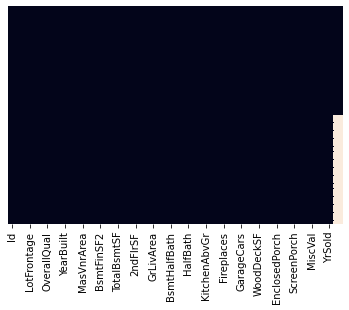

In [23]:
sns.heatmap(comb_df.isnull(), yticklabels = False, cbar = False)